### F1 future talent predictor
**by Andry Rakotonjanabelo and Md Nafisul Hasan Sami**

Exploratory Data Analysis notebook.

In [2]:
pip install kagglehub


  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/87/4b/b5023905576b960483207ab6506694101c594c18577e5a36a7189823015e/kagglehub-0.3.11-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/63.4 kB ? eta -:--:--
   ------------ --------------------------- 20.5/63.4 kB ? eta -:--:--
   ---------------------------------------- 63.4/63.4 kB 1.1 MB/s eta 0:00:00


In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alarchemn/formula-2-dataset")

print("Path to dataset files:", path)

100%|██████████| 157k/157k [00:00<00:00, 2.34MB/s]

Extracting files...
Path to dataset files: C:\Users\Andry Arthur\.cache\kagglehub\datasets\alarchemn\formula-2-dataset\versions\4


In [8]:
import os
import pandas as pd

# List files in the downloaded dataset directory
files = os.listdir(path)
print("Files in dataset directory:", files)

# Assuming the dataset is a CSV file, load it into a DataFrame
csv_file = [f for f in files if f.endswith('.csv')][0]  # Get the first CSV file
csv_path = os.path.join(path, csv_file)

# Create a DataFrame
formula_2_df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(formula_2_df.head())

Files in dataset directory: ['Feature-Race.csv', 'Free-Practice.csv', 'Qualifying-Session.csv', 'Sprint-Race-2.csv', 'Sprint-Race.csv']
   LAPS       TIME     GAP   INT.      KPH      BEST   LAP  POS  CAR  \
0    40  53:32.606       -      -  193.406  1:18.735  30.0  1.0    2   
1    40  53:35.569   2.963  2.963  193.228  1:18.602   9.0  2.0    8   
2    40  53:43.034  10.428  7.465  192.780  1:18.625  12.0  3.0    4   
3    40  53:43.392  10.786  0.358  192.759  1:18.573  10.0  4.0   19   
4    40  53:45.326  12.720  1.934  192.643  1:18.209  34.0  5.0    5   

        PILOT NAME            TEAM    CIRCUIT          TYPE     ROUND  \
0    N. Matsushita          Carlin  Spielberg  Feature Race  Round 6    
1       L. Ghiotto    UNI-Virtuosi  Spielberg  Feature Race  Round 6    
2      N. de Vries  ART Grand Prix  Spielberg  Feature Race  Round 6    
3        A. Hubert       BWT Arden  Spielberg  Feature Race  Round 6    
4  S. Sette Câmara            DAMS  Spielberg  Feature Race  Round

In [9]:
formula_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LAPS        1420 non-null   int64  
 1   TIME        1420 non-null   object 
 2   GAP         1420 non-null   object 
 3   INT.        1420 non-null   object 
 4   KPH         1420 non-null   float64
 5   BEST        1420 non-null   object 
 6   LAP         1420 non-null   float64
 7   POS         1420 non-null   float64
 8   CAR         1420 non-null   int64  
 9   PILOT NAME  1420 non-null   object 
 10  TEAM        1420 non-null   object 
 11  CIRCUIT     1420 non-null   object 
 12  TYPE        1420 non-null   object 
 13  ROUND       1420 non-null   object 
 14  DATE        1420 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 166.5+ KB


In [10]:
formula_2_df.describe()
formula_2_df.head()

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
0,40,53:32.606,-,-,193.406,1:18.735,30.0,1.0,2,N. Matsushita,Carlin,Spielberg,Feature Race,Round 6,2019-06-30
1,40,53:35.569,2.963,2.963,193.228,1:18.602,9.0,2.0,8,L. Ghiotto,UNI-Virtuosi,Spielberg,Feature Race,Round 6,2019-06-30
2,40,53:43.034,10.428,7.465,192.780,1:18.625,12.0,3.0,4,N. de Vries,ART Grand Prix,Spielberg,Feature Race,Round 6,2019-06-30
3,40,53:43.392,10.786,0.358,192.759,1:18.573,10.0,4.0,19,A. Hubert,BWT Arden,Spielberg,Feature Race,Round 6,2019-06-30
4,40,53:45.326,12.720,1.934,192.643,1:18.209,34.0,5.0,5,S. Sette Câmara,DAMS,Spielberg,Feature Race,Round 6,2019-06-30


In [15]:
from relbench.datasets import get_dataset
rel_f1_dataset = get_dataset("rel-f1")


In [18]:
type(rel_f1_dataset)
help(rel_f1_dataset)

Help on F1Dataset in module relbench.datasets.f1 object:

class F1Dataset(relbench.base.dataset.Dataset)
 |  F1Dataset(cache_dir: Optional[str] = None) -> None
 |  
 |  Method resolution order:
 |      F1Dataset
 |      relbench.base.dataset.Dataset
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  make_db(self) -> relbench.base.database.Database
 |      Process the raw files into a database.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  test_timestamp = Timestamp('2010-01-01 00:00:00')
 |  
 |  val_timestamp = Timestamp('2005-01-01 00:00:00')
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from relbench.base.dataset.Dataset:
 |  
 |  __init__(self, cache_dir: Optional[str] = None) -> None
 |      Create a dataset object.
 |      
 |      Args:
 |          cache_dir: A directory for caching the database 

In [33]:
# Process the raw files into a database
db = rel_f1_dataset.make_db()

# Check the type of the database
print(type(db))

<class 'relbench.base.database.Database'>


In [34]:
print(db)

Database()


In [35]:
# Example: If the database has a 'data' attribute
if hasattr(db, 'data'):
    rel_f1_df = pd.DataFrame(db.data)
    print(rel_f1_df.head())

In [37]:
print(dir(db))

# Check if 'data' exists
if hasattr(db, 'data'):
    print("db.data exists")
else:
    print("db.data does not exist")

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'from_', 'load', 'max_timestamp', 'min_timestamp', 'reindex_pkeys_and_fkeys', 'save', 'table_dict', 'upto']
db.data does not exist


In [38]:
# Inspect the table_dict attribute
print(type(db.table_dict))
print(db.table_dict.keys())  # List the keys (table names) in the dictionary

<class 'dict'>
dict_keys(['races', 'circuits', 'drivers', 'results', 'standings', 'constructors', 'constructor_results', 'constructor_standings', 'qualifying'])


In [41]:
# Access the 'drivers' table
drivers_table = db.table_dict['drivers']

# Check if the table has a 'df' attribute
if hasattr(drivers_table, 'df'):
    drivers_df = drivers_table.df  # Extract the DataFrame
    print(drivers_df.head())
else:
    print("The 'drivers' table does not have a 'df' attribute.")

   driverId   driverRef code  forename     surname        dob nationality
0         1    hamilton  HAM     Lewis    Hamilton 1985-01-07     British
1         2    heidfeld  HEI      Nick    Heidfeld 1977-05-10      German
2         3     rosberg  ROS      Nico     Rosberg 1985-06-27      German
3         4      alonso  ALO  Fernando      Alonso 1981-07-29     Spanish
4         5  kovalainen  KOV    Heikki  Kovalainen 1981-10-19     Finnish


In [42]:
# Iterate through all tables in table_dict
for table_name, table_obj in db.table_dict.items():
    if hasattr(table_obj, 'df'):
        print(f"Table: {table_name}")
        table_df = table_obj.df  # Extract the DataFrame
        print(table_df.head())
    else:
        print(f"Table {table_name} does not have a 'df' attribute.")

Table: races
   raceId  year  round  circuitId                   name                date  \
0       1  2009      1          1  Australian Grand Prix 2009-03-29 06:00:00   
1       2  2009      2          2   Malaysian Grand Prix 2009-04-05 09:00:00   
2       3  2009      3         17     Chinese Grand Prix 2009-04-19 07:00:00   
3       4  2009      4          3     Bahrain Grand Prix 2009-04-26 12:00:00   
4       5  2009      5          4     Spanish Grand Prix 2009-05-10 12:00:00   

       time  
0  06:00:00  
1  09:00:00  
2  07:00:00  
3  12:00:00  
4  12:00:00  
Table: circuits
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul      

In [43]:
# Access the 'drivers' table
if 'drivers' in db.table_dict:
    drivers_table = db.table_dict['drivers']
    
    # Extract the DataFrame from the 'drivers' table
    if hasattr(drivers_table, 'df'):
        drivers_df = drivers_table.df
        print(drivers_df.head())
    else:
        print("The 'drivers' table does not have a 'df' attribute.")
else:
    print("'drivers' table not found in table_dict.")

   driverId   driverRef code  forename     surname        dob nationality
0         1    hamilton  HAM     Lewis    Hamilton 1985-01-07     British
1         2    heidfeld  HEI      Nick    Heidfeld 1977-05-10      German
2         3     rosberg  ROS      Nico     Rosberg 1985-06-27      German
3         4      alonso  ALO  Fernando      Alonso 1981-07-29     Spanish
4         5  kovalainen  KOV    Heikki  Kovalainen 1981-10-19     Finnish


In [44]:
f3_tables = pd.read_html('https://motorsportstats.com/series/fia-formula-3-championship')

In [45]:
f3_tables

[             Team          Chassis           Engine     Car #  \
 0      AIX Racing  Dallara F3 2025  Mecachrome V634  26272828   
 1  ART Grand Prix  Dallara F3 2025  Mecachrome V634       789   
 2   Campos Racing  Dallara F3 2025  Mecachrome V634    101112   
 3  DAMS Lucas Oil  Dallara F3 2025  Mecachrome V634    293031   
 4      Hitech TGR  Dallara F3 2025  Mecachrome V634    141516   
 5   MP Motorsport  Dallara F3 2025  Mecachrome V634    171819   
 6    Prema Racing  Dallara F3 2025  Mecachrome V634         1   
 
                                               Driver  
 0  Francisco Javier SagreraNicola MarinangeliFred...  
 1      Laurens Van HoepenTuukka TaponenJames Wharton  
 2     Mari BoyaTasanapol InthraphuvasakNikola Tsolov  
 3          Nicola LacorteMatías ZagazetaChristian Ho  
 4  Martinius StenshorneJosh DufekWing Lam Gerrard...  
 5        Tim TramnitzBruno del PinoAlessandro Giusti  
 6                                      Brando Badoer  ,
                     

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [47]:
f3_table_1 = f3_tables[0]  # First table
f3_table_2 = f3_tables[1]  # Second table

# Convert them into DataFrames
df_f3_table_1 = pd.DataFrame(f3_table_1)
df_f3_table_2 = pd.DataFrame(f3_table_2)

# Display the first few rows of each DataFrame
print("First Table:")
print(df_f3_table_1.head())

print("\nSecond Table:")
print(df_f3_table_2.head())

First Table:
             Team          Chassis           Engine     Car #  \
0      AIX Racing  Dallara F3 2025  Mecachrome V634  26272828   
1  ART Grand Prix  Dallara F3 2025  Mecachrome V634       789   
2   Campos Racing  Dallara F3 2025  Mecachrome V634    101112   
3  DAMS Lucas Oil  Dallara F3 2025  Mecachrome V634    293031   
4      Hitech TGR  Dallara F3 2025  Mecachrome V634    141516   

                                              Driver  
0  Francisco Javier SagreraNicola MarinangeliFred...  
1      Laurens Van HoepenTuukka TaponenJames Wharton  
2     Mari BoyaTasanapol InthraphuvasakNikola Tsolov  
3          Nicola LacorteMatías ZagazetaChristian Ho  
4  Martinius StenshorneJosh DufekWing Lam Gerrard...  

Second Table:
              Driver           Entrant  RS  W  PD  PP  FL  BR  BG     AF  \
0  Alessandro Giusti     MP Motorsport   4  0   0   0   0   7   4  12.50   
1      Brando Badoer      Prema Racing   4  0   0   0   0  19  16  22.00   
2     Bruno del Pino   

In [49]:
f3_table_1.head()

,Team,Chassis,Engine,Car #,Driver
0,AIX Racing,Dallara F3 2025,Mecachrome V634,26272828,Francisco Javier SagreraNicola MarinangeliFred...
1,ART Grand Prix,Dallara F3 2025,Mecachrome V634,789,Laurens Van HoepenTuukka TaponenJames Wharton
2,Campos Racing,Dallara F3 2025,Mecachrome V634,101112,Mari BoyaTasanapol InthraphuvasakNikola Tsolov
3,DAMS Lucas Oil,Dallara F3 2025,Mecachrome V634,293031,Nicola LacorteMatías ZagazetaChristian Ho
4,Hitech TGR,Dallara F3 2025,Mecachrome V634,141516,Martinius StenshorneJosh DufekWing Lam Gerrard...


In [50]:
f3_table_2.head()

,Driver,Entrant,RS,W,PD,PP,FL,BR,BG,AF,AG,DNF,P,WC
0,Alessandro Giusti,MP Motorsport,4,0,0,0,0,7,4,12.50,10.25,0,10,15th
1,Brando Badoer,Prema Racing,4,0,0,0,0,19,16,22.00,22.00,0,0,30th
2,Bruno del Pino,MP Motorsport,4,0,0,0,0,9,5,17.00,18.00,1,2,19th
3,Callum Voisin,Rodin Motorsport,4,0,1,0,0,2,2,5.00,12.25,1,27,3rd
4,Charlie Wurz,Trident,4,0,0,0,0,6,3,8.67,6.50,1,10,14th


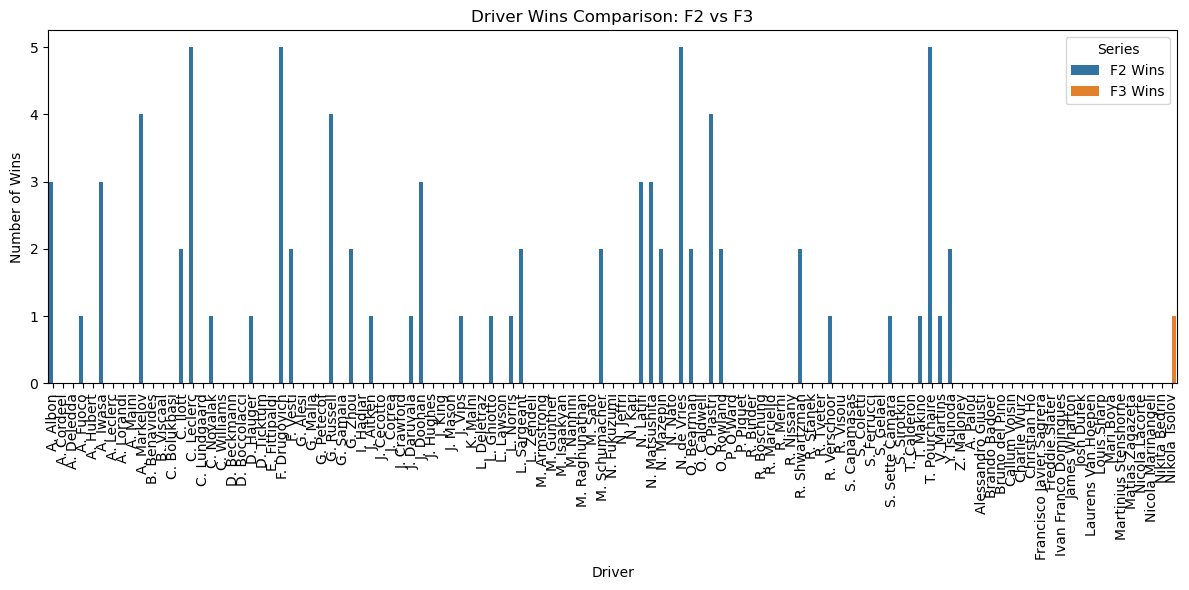

In [55]:
# Example: Compare total wins for F2 and F3 drivers
f2_wins = formula_2_df.groupby('PILOT NAME')['POS'].apply(lambda x: (x == 1).sum()).reset_index()
f2_wins.columns = ['Driver', 'F2 Wins']

f3_wins = df_f3_table_2[['Driver', 'W']].copy()
f3_wins.columns = ['Driver', 'F3 Wins']

# Merge F2 and F3 data
driver_wins = pd.merge(f2_wins, f3_wins, on='Driver', how='outer').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=driver_wins.melt(id_vars='Driver', var_name='Series', value_name='Wins'),
            x='Driver', y='Wins', hue='Series')
plt.xticks(rotation=90)
plt.title('Driver Wins Comparison: F2 vs F3')
plt.ylabel('Number of Wins')
plt.xlabel('Driver')
plt.legend(title='Series')
plt.tight_layout()
plt.show()

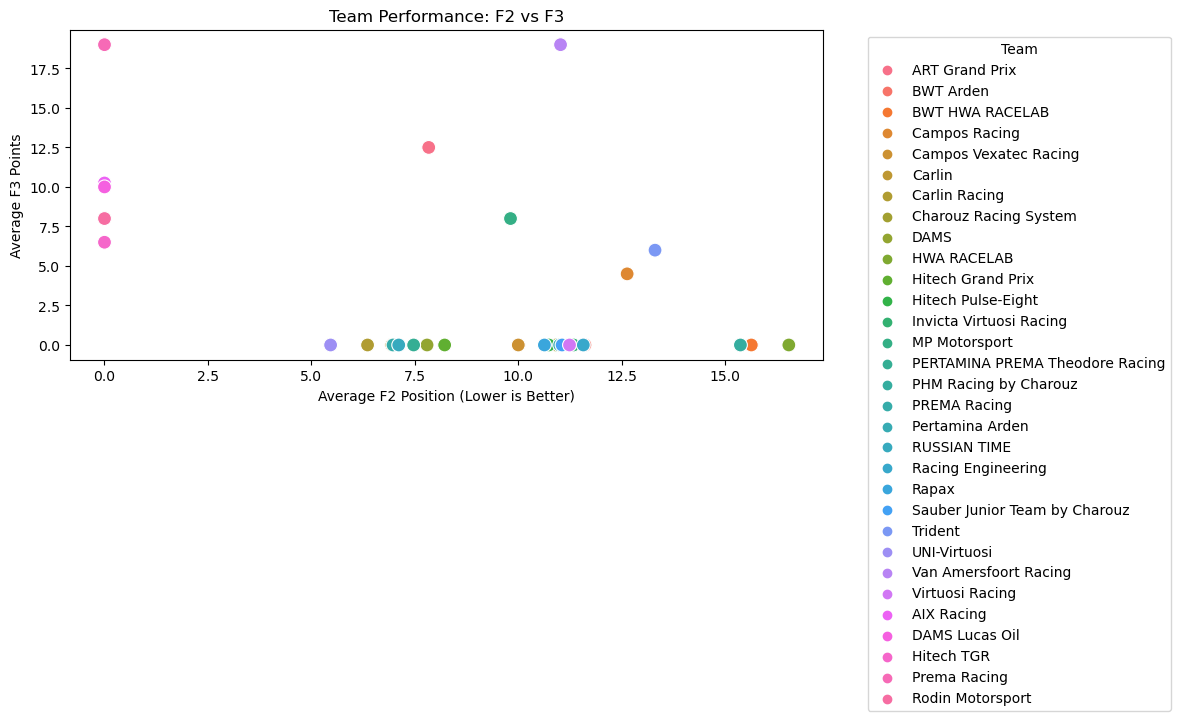

In [56]:
# Example: Average position by team in F2
f2_team_performance = formula_2_df.groupby('TEAM')['POS'].mean().reset_index()
f2_team_performance.columns = ['Team', 'Avg F2 Position']

# Example: Average points by team in F3
f3_team_performance = df_f3_table_2.groupby('Entrant')['BR'].mean().reset_index()
f3_team_performance.columns = ['Team', 'Avg F3 Points']

# Merge F2 and F3 team performance
team_performance = pd.merge(f2_team_performance, f3_team_performance, on='Team', how='outer').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=team_performance, x='Avg F2 Position', y='Avg F3 Points', hue='Team', s=100)
plt.title('Team Performance: F2 vs F3')
plt.xlabel('Average F2 Position (Lower is Better)')
plt.ylabel('Average F3 Points')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()